<a href="https://colab.research.google.com/github/ruforavishnu/attempting_kaggle_2025_santa_competition/blob/main/04_greedy_placement_heuristics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import matplotlib.pyplot as plt

class Rect:
  def __init__(self, w, h, x=None,  y=None,  rot=0,  id=None):
    self.w = w
    self.h = h
    self.x = x
    self.y = y
    self.rot = rot
    self.id = id

  def placed(self):
    return self.x is not None and self.y is not None


  def dimensions(self):
    if self.rot % 100 == 0:
      return self.w , self.h

    else:
      return self.h, self.w


  def bbox(self):

    w,h = self.dimensions()
    return (self.x, self.y, self.x + w, self.y + h)





In [ ]:
def plot_rectangles(rects, world_w=100, world_h=100):
  fig, ax = plt.subplots(figsize=(8,8))

  ax.add_patch(plt.Rectangle( (0,0)   , world_w,    world_h,    fill=False, edgecolor='black'))


  for rect in rects:
    if rect.placed():
      w,h = rect.dimensions()

      ax.add_patch(plt.Rectangle( (rect.x, rect.y), w, h, fill=True, alpha=0.3, edgecolor='black'))

      if rect.id is not None:
        ax.text(rect.x + w/2, rect.y + h/2, str(rect.id), ha='center', va='center')


  ax.set_xlim(0, world_w)
  ax.set_ylim(0, world_h)
  ax.set_aspect('equal')
  plt.show()




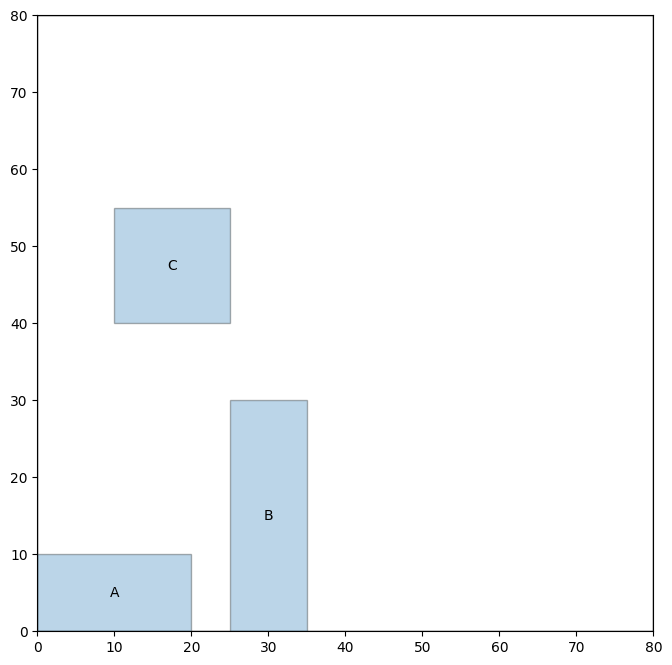

In [ ]:
rects = [

        Rect(20, 10, x=0, y=0, id='A'),
        Rect(10, 30, x=25, y=0, id='B'),
        Rect(15, 15, x=10, y=40, id='C')
      ]


plot_rectangles(rects, world_w=80, world_h=80)




### Lets first do rectangle-rectangle collision checking

In [ ]:
def rects_overlap(r1, r2):

  x1_min, y1_min, x1_max, y1_max = r1.bbox()
  x2_min, y2_min, x2_max, y2_max = r2.bbox()

  if x1_max <= x2_min or x2_max <= x1_min:
    return False

  if y1_max <= y2_min or y2_max <= y1_min:
    return False

  return True



##### Boundary check

In [ ]:
def inside_world(rect, x, y, world_w, world_h):

  w,h = rect.dimensions()
  return ( 0 <= x <= world_w - w  ) and (0 <= y <= world_h - h)



In [ ]:
def can_place(rect, x, y, placed_rects, world_w,  world_h):
  rect.x = x
  rect.y = y

  if not inside_world(rect, x, y, world_w, world_h):
    rect.x = rect.y = None
    return False


  for other in placed_rects:
    if rects_overlap(rect, other):
      rect.x = rect.y = None
      return False


  rect.x = rect.y = None
  return True



In [ ]:
world_w = 100
world_h = 100

placed = [
    Rect(20, 20, x=10, y=10),
    Rect(30, 10, x=40, y=10)
]

test_rect = Rect(15, 15)


print('Should be true: ', can_place(test_rect, 70, 70, placed, world_w, world_h))
print('Should be false (collision) :', can_place(test_rect, 15, 15, placed, world_w, world_h))
print('Shoult be false (out-of-bounds) :', can_place(test_rect, 90, 90, placed, world_w, world_h))



Should be true:  True
Should be false (collision) : False
Shoult be false (out-of-bounds) : False
